# Stock Prediction Using Data From Yahoo Finance

In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import yfinance as yahooFinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
# We're going to get information for three companies: Google, Amazon, and Netflix

Google_info = yahooFinance.Ticker('GOOGL')
Amazon_info = yahooFinance.Ticker('AMZN')
Netflix_info = yahooFinance.Ticker('NFLX')

In [4]:
print(Google_info.info)

{'zip': '94043', 'sector': 'Communication Services', 'fullTimeEmployees': 186779, 'longBusinessSummary': 'Alphabet Inc. provides various products and platforms in the United States, Europe, the Middle East, Africa, the Asia-Pacific, Canada, and Latin America. It operates through Google Services, Google Cloud, and Other Bets segments. The Google Services segment offers products and services, including ads, Android, Chrome, hardware, Gmail, Google Drive, Google Maps, Google Photos, Google Play, Search, and YouTube. It is also involved in the sale of apps and in-app purchases and digital content in the Google Play store; and Fitbit wearable devices, Google Nest home products, Pixel phones, and other devices, as well as in the provision of YouTube non-advertising services. The Google Cloud segment offers infrastructure, platform, and other services; Google Workspace that include cloud-based collaboration tools for enterprises, such as Gmail, Docs, Drive, Calendar, and Meet; and other servi

In [5]:
print(Amazon_info.info)

{'zip': '98109-5210', 'sector': 'Consumer Cyclical', 'fullTimeEmployees': 1544000, 'longBusinessSummary': 'Amazon.com, Inc. engages in the retail sale of consumer products and subscriptions in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It sells merchandise and content purchased for resale from third-party sellers through physical and online stores. The company also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Rings, and Echo and other devices; provides Kindle Direct Publishing, an online service that allows independent authors and publishers to make their books available in the Kindle Store; and develops and produces media content. In addition, it offers programs that enable sellers to sell their products on its websites, as well as its stores; and programs that allow authors, musicians, filmmakers, Twitch streamers, skill and app developers, and oth

In [6]:
print(Netflix_info.info)

{'zip': '95032', 'sector': 'Communication Services', 'fullTimeEmployees': 11300, 'longBusinessSummary': 'Netflix, Inc. provides entertainment services. It offers TV series, documentaries, feature films, and mobile games across various genres and languages. The company provides members the ability to receive streaming content through a host of internet-connected devices, including TVs, digital video players, television set-top boxes, and mobile devices. It also provides DVDs-by-mail membership services in the United States. The company has approximately 222 million paid members in 190 countries. Netflix, Inc. was incorporated in 1997 and is headquartered in Los Gatos, California.', 'city': 'Los Gatos', 'phone': '408 540 3700', 'state': 'CA', 'country': 'United States', 'companyOfficers': [], 'website': 'https://www.netflix.com', 'maxAge': 1, 'address1': '100 Winchester Circle', 'industry': 'Entertainment', 'ebitdaMargins': 0.19134001, 'profitMargins': 0.16027, 'grossMargins': 0.39619, '

In [7]:
Google_df = Google_info.history(period='max')

In [8]:
Netflix_df = Netflix_info.history(period='max')

In [9]:
Amazon_df = Amazon_info.history(period='max')

In [10]:
#Let's save this so we don't have to pull the information again

Google_df.to_csv('Google_Stocks.csv')
Amazon_df.to_csv('Amazon_Stocks.csv')
Netflix_df.to_csv('Netflix_Stocks.csv')

For the now I'm going to only look at the Amazon data. But I will come back and perform the same analysis of the other two datasets eventually.

In [11]:
Amazon_df.shape

(6423, 7)

In [12]:
Amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6423 entries, 1997-05-15 00:00:00-04:00 to 2022-11-18 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6423 non-null   float64
 1   High          6423 non-null   float64
 2   Low           6423 non-null   float64
 3   Close         6423 non-null   float64
 4   Volume        6423 non-null   int64  
 5   Dividends     6423 non-null   int64  
 6   Stock Splits  6423 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 659.5 KB


In [13]:
Amazon_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0,0.0
1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0,0.0
1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0,0.0
1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0,0.0
1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0,0.0


I see that the index is the date, but with time included as well. To make this a little easier to deal with in the long run, let's reset the index, and convert the Date to only include the date.

In [14]:
Amazon_df.reset_index(inplace = True)

In [15]:
train_start = '1997-01-01'
train_end = '2015-12-31'
valid_start = '2016-01-01'
valid_end = '2018-12-31'
test_start = '2019-01-01'
test_end = '2021-12-31'

train_mask = (Amazon_df['Date'] >= train_start) & (Amazon_df['Date'] <= train_end)
valid_mask = (Amazon_df['Date'] >= valid_start) & (Amazon_df['Date'] <= valid_end)
test_mask = (Amazon_df['Date'] >= test_start) & (Amazon_df['Date'] <= test_end)

In [16]:
train_set = Amazon_df.loc[train_mask]
valid_set = Amazon_df.loc[valid_mask]
test_set = Amazon_df.loc[test_mask]

In [17]:
train_set

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0,0.0
...,...,...,...,...,...,...,...,...
4684,2015-12-24 00:00:00-05:00,33.167500,33.234001,33.029999,33.139500,21824000,0,0.0
4685,2015-12-28 00:00:00-05:00,33.278000,33.775002,33.275002,33.759998,75672000,0,0.0
4686,2015-12-29 00:00:00-05:00,33.898998,34.821999,33.894501,34.698502,114700000,0,0.0
4687,2015-12-30 00:00:00-05:00,34.594501,34.774502,34.319000,34.453499,70380000,0,0.0


### Data Exploration and Preliminary Analysis

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 9)

In [19]:
train_set.shape

(4689, 8)

In [20]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4689 entries, 0 to 4688
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          4689 non-null   datetime64[ns, America/New_York]
 1   Open          4689 non-null   float64                         
 2   High          4689 non-null   float64                         
 3   Low           4689 non-null   float64                         
 4   Close         4689 non-null   float64                         
 5   Volume        4689 non-null   int64                           
 6   Dividends     4689 non-null   int64                           
 7   Stock Splits  4689 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(5), int64(2)
memory usage: 329.7 KB


In [21]:
train_set.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4689.000000,4689.000000,4689.000000,4689.000000,4.689000e+03,4689.0,4689.000000
mean,5.926373,6.013408,5.837005,5.928352,1.657016e+08,0.0,0.001493
std,6.576142,6.636063,6.507445,6.574630,1.573692e+08,0.0,0.060200
min,0.070313,0.072396,0.065625,0.069792,9.744000e+06,0.0,0.000000
25%,1.698000,1.727000,1.663500,1.698000,8.426200e+07,0.0,0.000000
50%,3.057500,3.150000,2.937500,3.054688,1.247380e+08,0.0,0.000000
75%,9.134500,9.243500,9.029000,9.137500,1.858520e+08,0.0,0.000000
max,34.594501,34.821999,34.319000,34.698502,2.086584e+09,0.0,3.000000


In [22]:
train_set.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0,0.0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0,0.0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0,0.0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0,0.0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0,0.0


In [23]:
train_set.sample(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
300,1998-07-24 00:00:00-04:00,1.077083,1.095833,0.975000,1.035417,579480000,0,0.0
3584,2011-08-11 00:00:00-04:00,9.850500,10.042500,9.568000,9.918000,148038000,0,0.0
191,1998-02-18 00:00:00-05:00,0.257292,0.257292,0.252604,0.253646,59424000,0,0.0
4408,2014-11-19 00:00:00-05:00,16.362499,16.420000,16.201000,16.327000,65632000,0,0.0
358,1998-10-15 00:00:00-04:00,0.785417,0.815625,0.770833,0.808854,339420000,0,0.0


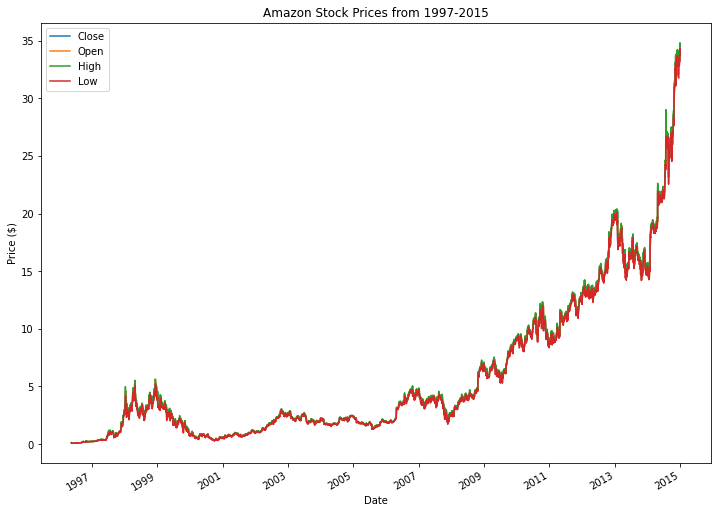

In [24]:
train_set.plot(x = 'Date', y=["Close", "Open", "High", "Low"])
plt.ylabel('Price ($)')
plt.title('Amazon Stock Prices from 1997-2015')
plt.savefig("amazon.jpg")

In [25]:
# This will be nice when I come back through with the other two datasets.

def explore(df):
  """Automatically perform a small exploratory analysis of a given dataframe."""
  print("Shape", df.shape, "\n")
  print("Columns", df.columns, "\n")
  df.info()
  print("\n", df.describe(), "\n")
  print("The data ranges from", df.index.min(), "to", df.index.max())
  df.plot(x = 'Date', y=["Close", "Open", "High", "Low"])

Shape (4689, 8) 

Columns Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4689 entries, 0 to 4688
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          4689 non-null   datetime64[ns, America/New_York]
 1   Open          4689 non-null   float64                         
 2   High          4689 non-null   float64                         
 3   Low           4689 non-null   float64                         
 4   Close         4689 non-null   float64                         
 5   Volume        4689 non-null   int64                           
 6   Dividends     4689 non-null   int64                           
 7   Stock Splits  4689 non-null   float64                         
dtypes: datetime64[ns, America/New_York](1), float64(5), int64(2)
memo

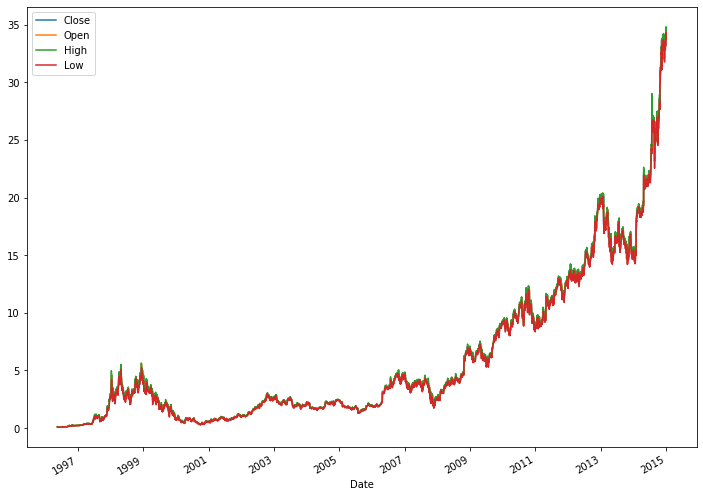

In [26]:
explore(train_set)

In [27]:
def target(df):
  df.sort_values(by = 'Date', inplace = True)
  df['Target'] = (df['Close'] > df['Open']).shift(periods = -1, fill_value = 0).astype(int)

In [28]:
target(train_set)
target(valid_set)
target(test_set)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [29]:
train_set

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0,0.0,0
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0,0.0,0
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0,0.0,0
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0,0.0,0
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0,0.0,0
...,...,...,...,...,...,...,...,...,...
4684,2015-12-24 00:00:00-05:00,33.167500,33.234001,33.029999,33.139500,21824000,0,0.0,1
4685,2015-12-28 00:00:00-05:00,33.278000,33.775002,33.275002,33.759998,75672000,0,0.0,1
4686,2015-12-29 00:00:00-05:00,33.898998,34.821999,33.894501,34.698502,114700000,0,0.0,0
4687,2015-12-30 00:00:00-05:00,34.594501,34.774502,34.319000,34.453499,70380000,0,0.0,0


In [30]:
valid_set

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
4689,2016-01-04 00:00:00-05:00,32.814499,32.886002,31.375500,31.849501,186290000,0,0.0,0
4690,2016-01-05 00:00:00-05:00,32.342999,32.345501,31.382500,31.689501,116452000,0,0.0,1
4691,2016-01-06 00:00:00-05:00,31.100000,31.989500,31.015499,31.632500,106584000,0,0.0,0
4692,2016-01-07 00:00:00-05:00,31.090000,31.500000,30.260500,30.396999,141498000,0,0.0,0
4693,2016-01-08 00:00:00-05:00,30.983000,31.207001,30.299999,30.352501,110258000,0,0.0,1
...,...,...,...,...,...,...,...,...,...
5438,2018-12-24 00:00:00-05:00,67.300003,69.801498,65.349998,67.197998,144400000,0,0.0,1
5439,2018-12-26 00:00:00-05:00,68.444504,73.657997,68.150497,73.544998,208236000,0,0.0,1
5440,2018-12-27 00:00:00-05:00,72.709999,73.449997,69.515503,73.082001,194440000,0,0.0,1
5441,2018-12-28 00:00:00-05:00,73.667503,75.673500,72.449997,73.901001,176580000,0,0.0,0


In [31]:
test_set

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Target
5443,2019-01-02 00:00:00-05:00,73.260002,77.667999,73.046501,76.956497,159662000,0,0.0,0
5444,2019-01-03 00:00:00-05:00,76.000504,76.900002,74.855499,75.014000,139512000,0,0.0,1
5445,2019-01-04 00:00:00-05:00,76.500000,79.699997,75.915497,78.769501,183652000,0,0.0,1
5446,2019-01-07 00:00:00-05:00,80.115501,81.727997,79.459503,81.475502,159864000,0,0.0,0
5447,2019-01-08 00:00:00-05:00,83.234497,83.830498,80.830498,82.829002,177628000,0,0.0,1
...,...,...,...,...,...,...,...,...,...
6195,2021-12-27 00:00:00-05:00,171.037003,172.942993,169.215500,169.669495,58688000,0,0.0,1
6196,2021-12-28 00:00:00-05:00,170.182495,172.175995,169.135498,170.660995,54638000,0,0.0,0
6197,2021-12-29 00:00:00-05:00,170.839996,171.212006,168.600494,169.201004,35754000,0,0.0,0
6198,2021-12-30 00:00:00-05:00,169.699997,170.888000,168.524002,168.644501,37584000,0,0.0,0


### Preparing the data for the models

In [32]:
(train_set['Dividends'] == 0).sum()

4689

In [33]:
(train_set['Stock Splits'] == 0).sum()

4686

In [34]:
# Dividends and Stock Splits aren't useful features, so let's go ahead and get rid of those
def col_drop(df,cols_to_drop):
  df = df.drop(cols_to_drop, axis = 1, inplace = True)

In [35]:
cols = ['Dividends', 'Stock Splits']

col_drop(train_set, cols)
col_drop(valid_set, cols)
col_drop(test_set, cols)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Before we get too far at looking at the data set, we should split this into a training set, validation set, and a test set.

### Feature Engineering

Stock prices are very clearly dependent on time, but we need to potentially take more into account for a single day's price changes. A common technique when considering stock trends is to calculate a [moving mean or a rolling mean](https://www.investopedia.com/terms/m/movingaverage.asp). Luckily, Pandas has a feature built right in just for this. So let's add a 3-day, 5-day, and 7-day moving average into our data set as new features to consider.

In [36]:
def mov_avg(df, num_days):
  df['Moving_Average_' + str(num_days)] = (df['Close'] - df['Open']).rolling(window = num_days, min_periods = 1).mean()

In [37]:
days = [3,5,7]

for num in days:
  mov_avg(train_set, num)
  mov_avg(valid_set, num)
  mov_avg(test_set, num)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [38]:
train_set

,Date,Open,High,Low,Close,Volume,Target,Moving_Average_3,Moving_Average_5,Moving_Average_7
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0,-0.023958,-0.023958,-0.023958
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0,-0.017969,-0.017969,-0.017969
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0,-0.012847,-0.012847,-0.012847
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0,-0.006424,-0.010807,-0.010807
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0,-0.005903,-0.010729,-0.010729
...,...,...,...,...,...,...,...,...,...,...
4684,2015-12-24 00:00:00-05:00,33.167500,33.234001,33.029999,33.139500,21824000,1,-0.117332,-0.155399,-0.090571
4685,2015-12-28 00:00:00-05:00,33.278000,33.775002,33.275002,33.759998,75672000,1,0.104666,-0.013900,-0.108928
4686,2015-12-29 00:00:00-05:00,33.898998,34.821999,33.894501,34.698502,114700000,0,0.417834,0.185901,0.072072
4687,2015-12-30 00:00:00-05:00,34.594501,34.774502,34.319000,34.453499,70380000,0,0.380166,0.194500,0.084143


Just the current direction of the day's price fluctuation could be useful, or the range of max to min for the day, etc. With more field specific training, I think that I would consider other manufactured features as well, but this should suffice for the project.

In [39]:
def range_dir(df):
  df['Todays_direction'] = df['Close'] - df['Open']
  df['Price_range'] = df['High'] - df['Low']

In [40]:
range_dir(train_set)
range_dir(valid_set)
range_dir(test_set)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [41]:
train_set

,Date,Open,High,Low,Close,Volume,Target,Moving_Average_3,Moving_Average_5,Moving_Average_7,Todays_direction,Price_range
0,1997-05-15 00:00:00-04:00,0.121875,0.125000,0.096354,0.097917,1443120000,0,-0.023958,-0.023958,-0.023958,-0.023958,0.028646
1,1997-05-16 00:00:00-04:00,0.098438,0.098958,0.085417,0.086458,294000000,0,-0.017969,-0.017969,-0.017969,-0.011980,0.013541
2,1997-05-19 00:00:00-04:00,0.088021,0.088542,0.081250,0.085417,122136000,0,-0.012847,-0.012847,-0.012847,-0.002604,0.007292
3,1997-05-20 00:00:00-04:00,0.086458,0.087500,0.081771,0.081771,109344000,0,-0.006424,-0.010807,-0.010807,-0.004687,0.005729
4,1997-05-21 00:00:00-04:00,0.081771,0.082292,0.068750,0.071354,377064000,0,-0.005903,-0.010729,-0.010729,-0.010417,0.013542
...,...,...,...,...,...,...,...,...,...,...,...,...
4684,2015-12-24 00:00:00-05:00,33.167500,33.234001,33.029999,33.139500,21824000,1,-0.117332,-0.155399,-0.090571,-0.028000,0.204002
4685,2015-12-28 00:00:00-05:00,33.278000,33.775002,33.275002,33.759998,75672000,1,0.104666,-0.013900,-0.108928,0.481998,0.500000
4686,2015-12-29 00:00:00-05:00,33.898998,34.821999,33.894501,34.698502,114700000,0,0.417834,0.185901,0.072072,0.799503,0.927498
4687,2015-12-30 00:00:00-05:00,34.594501,34.774502,34.319000,34.453499,70380000,0,0.380166,0.194500,0.084143,-0.141003,0.455502


In [42]:
# Final step, pull all sets into their respective features and target sets
X_train = train_set.drop(['Date', 'Target'], axis = 1).copy()
y_train = train_set['Target']

X_valid = valid_set.drop(['Date', 'Target'], axis = 1).copy()
y_valid = valid_set['Target']

X_test = test_set.drop(['Date', 'Target'], axis = 1).copy()
y_test = test_set['Target']

In [43]:
X_train

,Open,High,Low,Close,Volume,Moving_Average_3,Moving_Average_5,Moving_Average_7,Todays_direction,Price_range
0,0.121875,0.125000,0.096354,0.097917,1443120000,-0.023958,-0.023958,-0.023958,-0.023958,0.028646
1,0.098438,0.098958,0.085417,0.086458,294000000,-0.017969,-0.017969,-0.017969,-0.011980,0.013541
2,0.088021,0.088542,0.081250,0.085417,122136000,-0.012847,-0.012847,-0.012847,-0.002604,0.007292
3,0.086458,0.087500,0.081771,0.081771,109344000,-0.006424,-0.010807,-0.010807,-0.004687,0.005729
4,0.081771,0.082292,0.068750,0.071354,377064000,-0.005903,-0.010729,-0.010729,-0.010417,0.013542
...,...,...,...,...,...,...,...,...,...,...
4684,33.167500,33.234001,33.029999,33.139500,21824000,-0.117332,-0.155399,-0.090571,-0.028000,0.204002
4685,33.278000,33.775002,33.275002,33.759998,75672000,0.104666,-0.013900,-0.108928,0.481998,0.500000
4686,33.898998,34.821999,33.894501,34.698502,114700000,0.417834,0.185901,0.072072,0.799503,0.927498
4687,34.594501,34.774502,34.319000,34.453499,70380000,0.380166,0.194500,0.084143,-0.141003,0.455502


In [44]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
4684    1
4685    1
4686    0
4687    0
4688    0
Name: Target, Length: 4689, dtype: int64

### Simple Machine Learning Algorithms

In this section, I want to explore applying some of the simpler algorithms, and just check to see how well they are performing on the training set.

In [45]:
# Just double checking that we have the features we want to use.
X_train.head()

,Open,High,Low,Close,Volume,Moving_Average_3,Moving_Average_5,Moving_Average_7,Todays_direction,Price_range
0,0.121875,0.125000,0.096354,0.097917,1443120000,-0.023958,-0.023958,-0.023958,-0.023958,0.028646
1,0.098438,0.098958,0.085417,0.086458,294000000,-0.017969,-0.017969,-0.017969,-0.011980,0.013541
2,0.088021,0.088542,0.081250,0.085417,122136000,-0.012847,-0.012847,-0.012847,-0.002604,0.007292
3,0.086458,0.087500,0.081771,0.081771,109344000,-0.006424,-0.010807,-0.010807,-0.004687,0.005729
4,0.081771,0.082292,0.068750,0.071354,377064000,-0.005903,-0.010729,-0.010729,-0.010417,0.013542


#### Logistic Regression

Logistic Regression seems like an obvious first choice. It's the first binary classifier I remember learning, and it's fairly cheap to run.

In [46]:
# Save random state to reproduce our results
rnd_state = 42

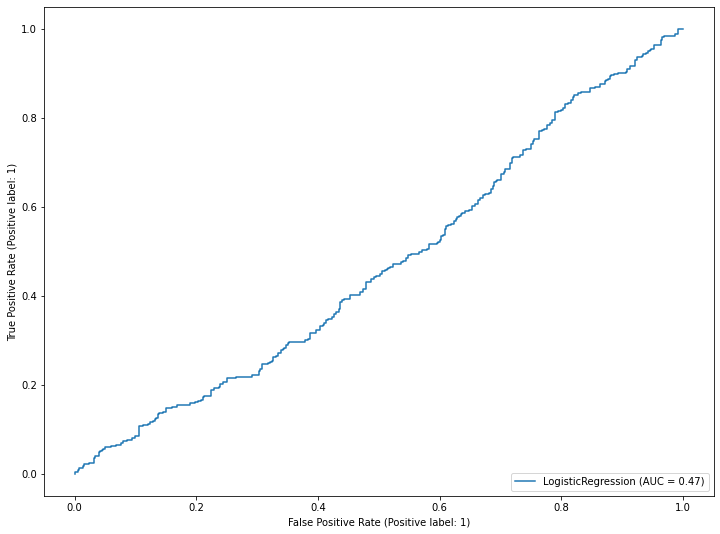

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay

# use default parameters
lr = LogisticRegression()

# fit to train set
lr.fit(X_train, y_train)

# plot ROC curve, and show AUC for the validation set
RocCurveDisplay.from_estimator(lr, X_valid, y_valid)

Not really all that good. AUC is below 0.5, which means we could randomly guess and get better results.

#### Decision Tree

Typically, Decision Trees handle spaces that aren't just linear a little better. So let's see what we get here:

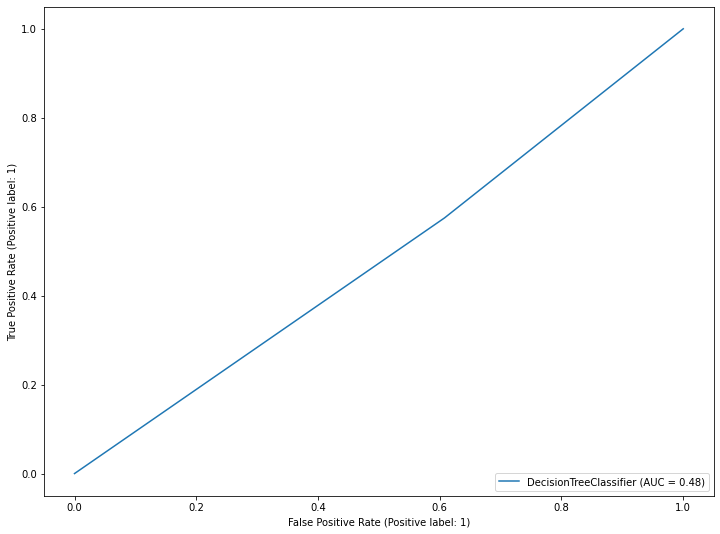

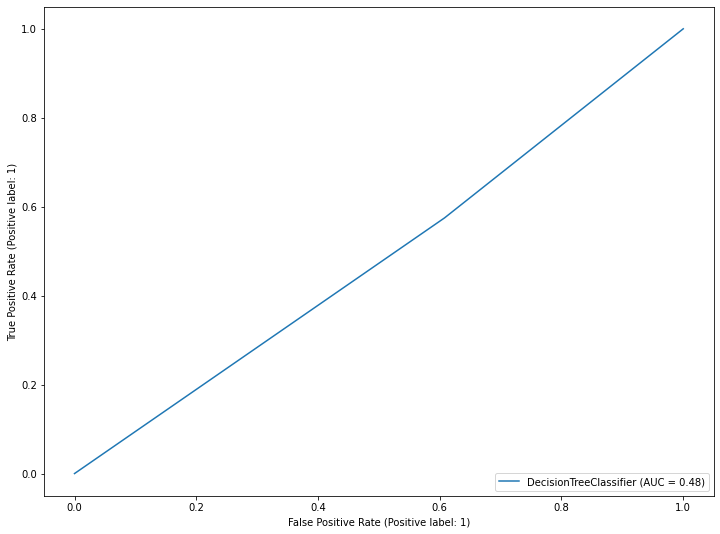

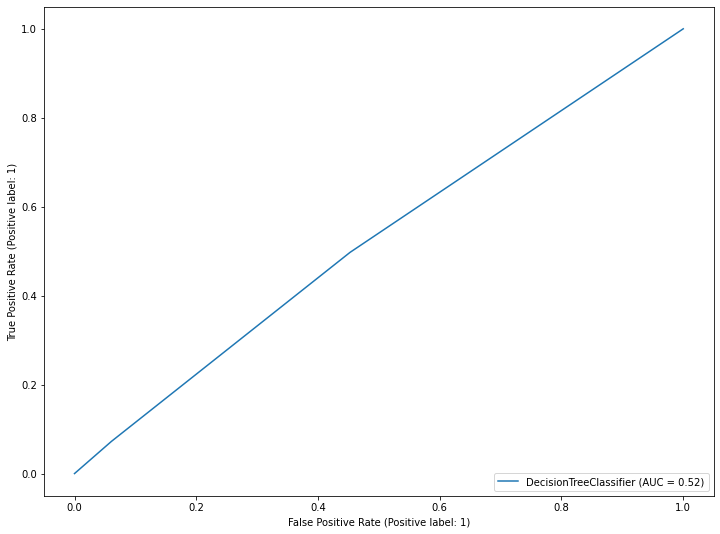

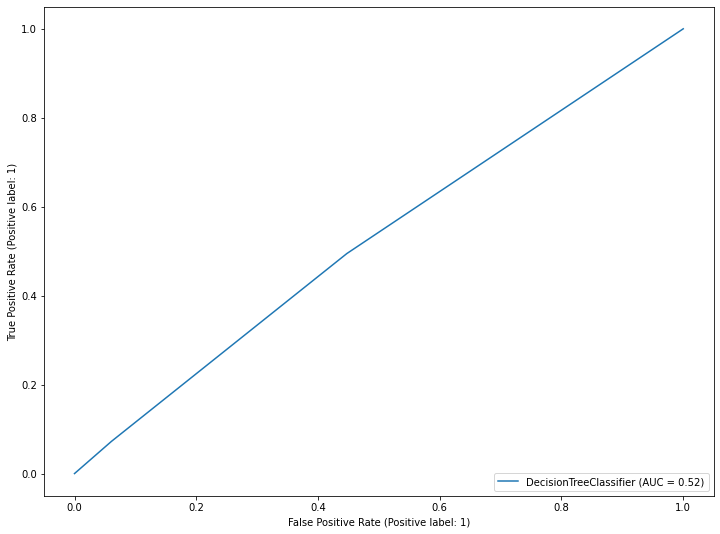

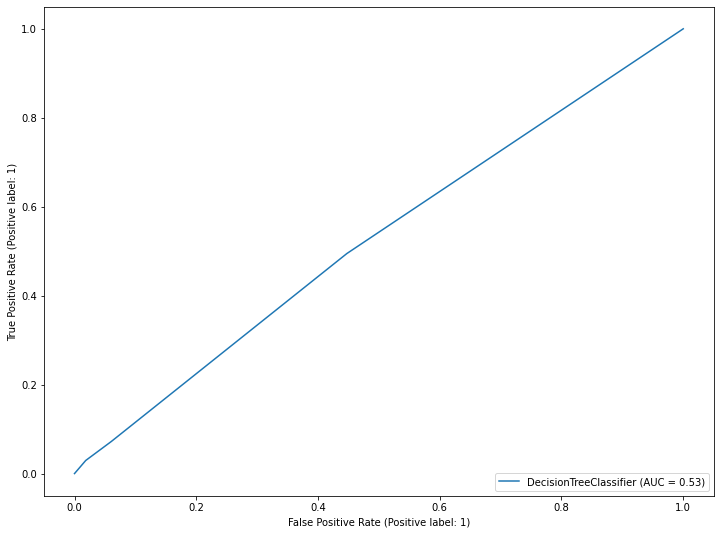

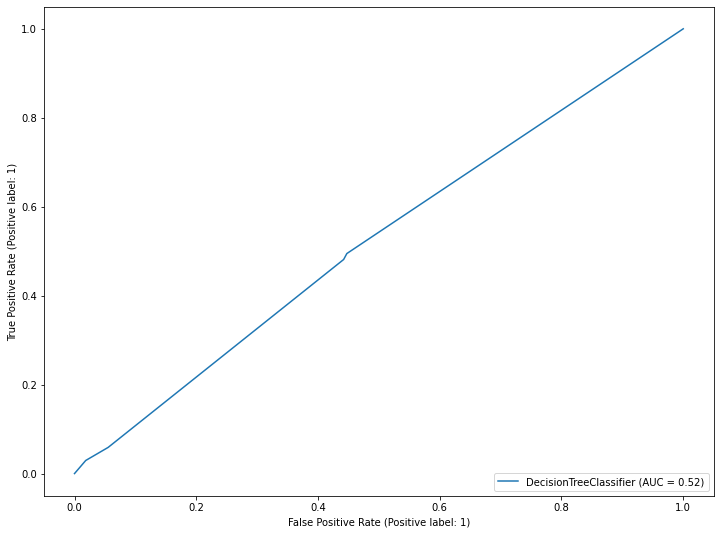

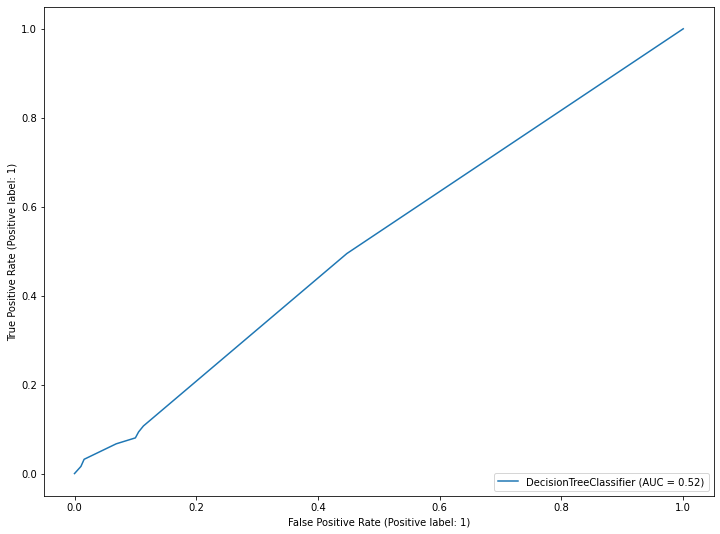

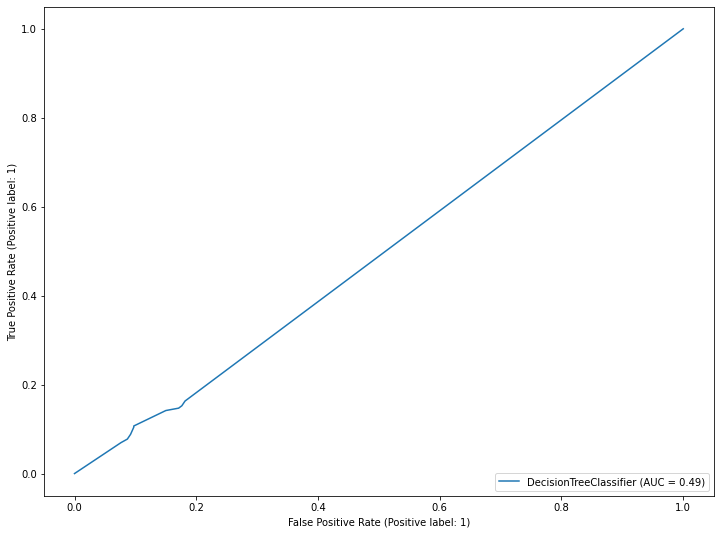

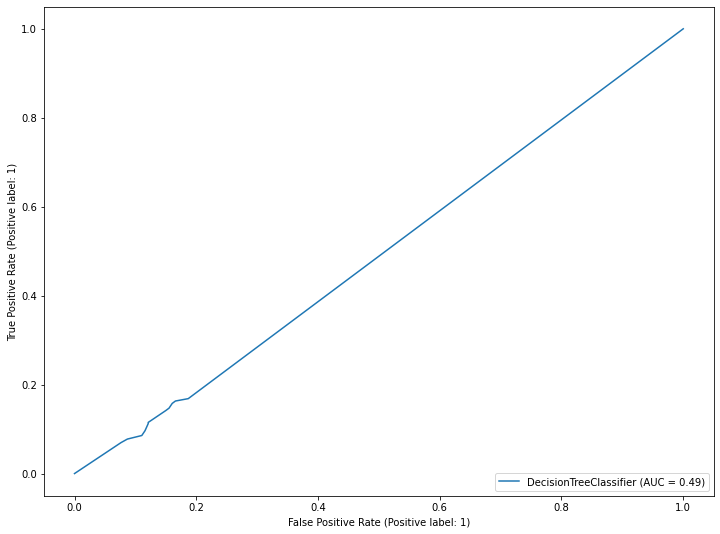

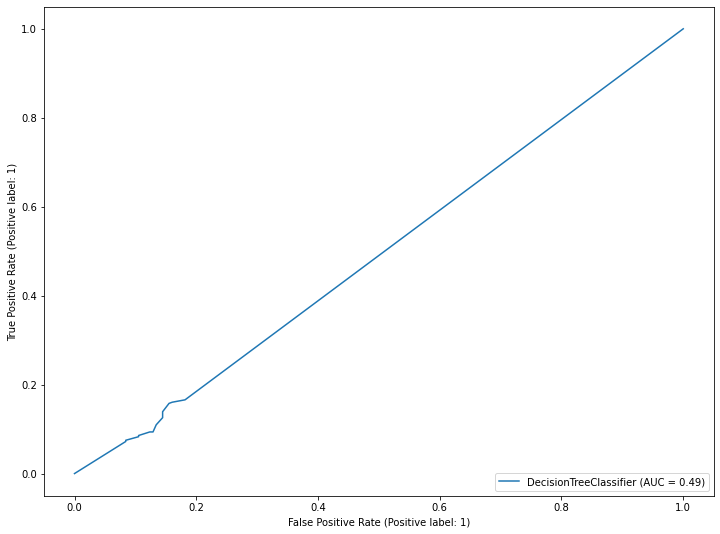

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Let's check the AUC for max_depth up to 10.
for i in range(1,11):
  tree_clf = DecisionTreeClassifier(random_state=rnd_state, max_depth=i)
  tree_clf.fit(X_train, y_train)

  RocCurveDisplay.from_estimator(tree_clf, X_valid, y_valid)

#### Random Forest

Random forests use many decision trees, the 'forest', and then deploys an ensemple model utilizing different subsets of features. We would hope that this should perform as well as, if not better, than the Decision Tree.

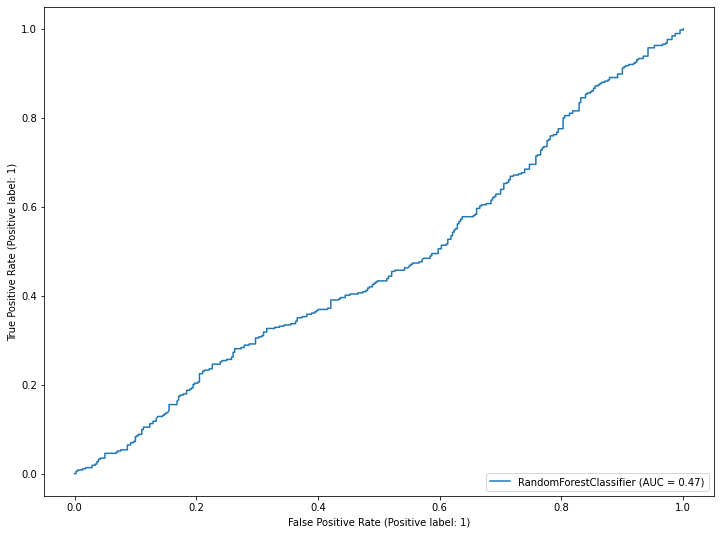

In [49]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=20, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RocCurveDisplay.from_estimator(rnd_clf, X_valid, y_valid)

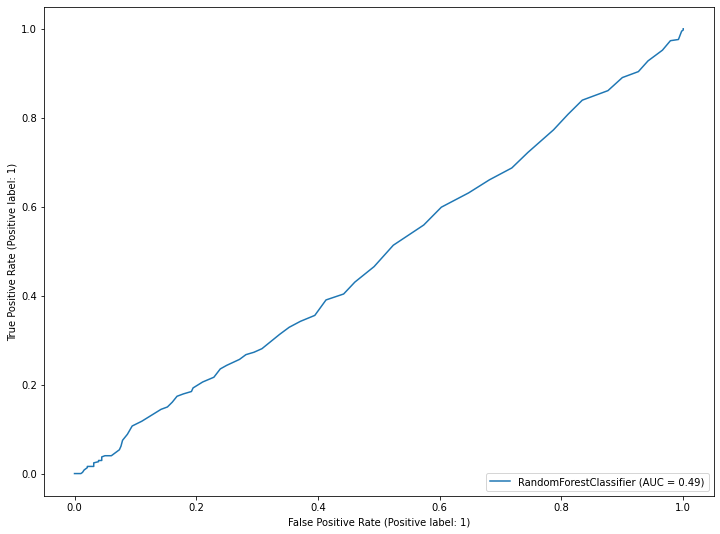

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=rnd_state)
rf.fit(X_train, y_train)

RocCurveDisplay.from_estimator(rf, X_valid, y_valid)

#### Gradient Boosting Ensemble

Sort of depressed that logistic worked so well right off the bat, the DT and RF methods haven't done as well. I'll try one last Ensemble method, a gradient boosting classifier. These learn the trees one at a time, and at each iteration instance, feedback is passed along about all of the incorrect classifications. I have seen performance improve with these, but rarely huge compared to the other methods already deployed.

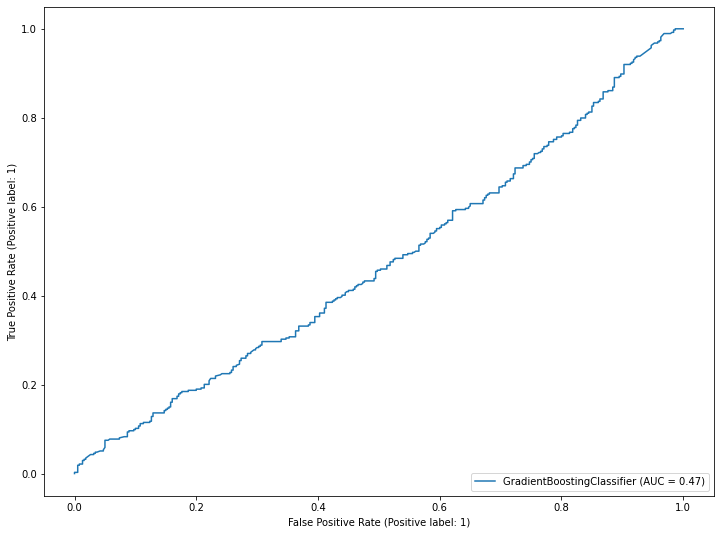

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=rnd_state,)
gb.fit(X_train, y_train)

RocCurveDisplay.from_estimator(gb, X_valid, y_valid)

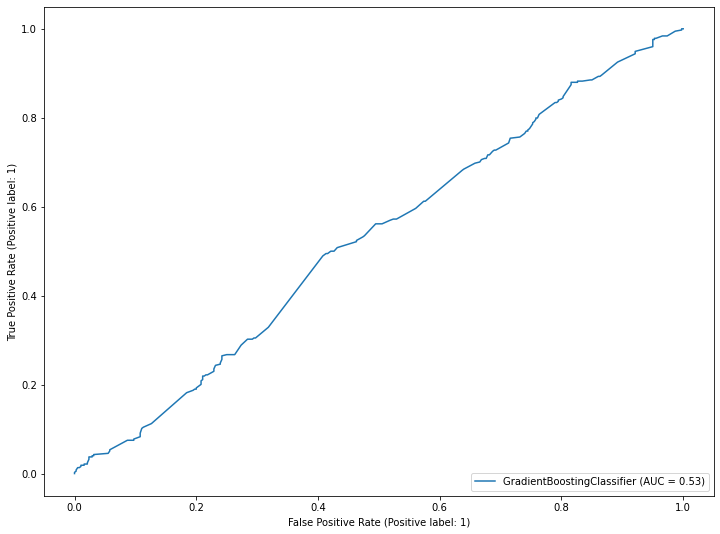

In [52]:
from sklearn.ensemble import GradientBoostingRegressor


gbrt = GradientBoostingClassifier(max_depth=4, n_estimators=5, learning_rate=1.0, random_state=rnd_state)
gbrt.fit(X_train, y_train)

RocCurveDisplay.from_estimator(gbrt, X_valid, y_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_plot/roc_curve.py:122: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and m

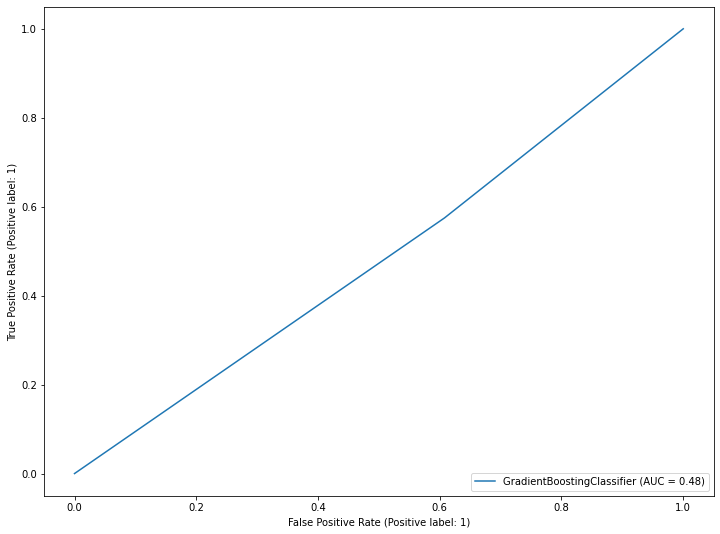

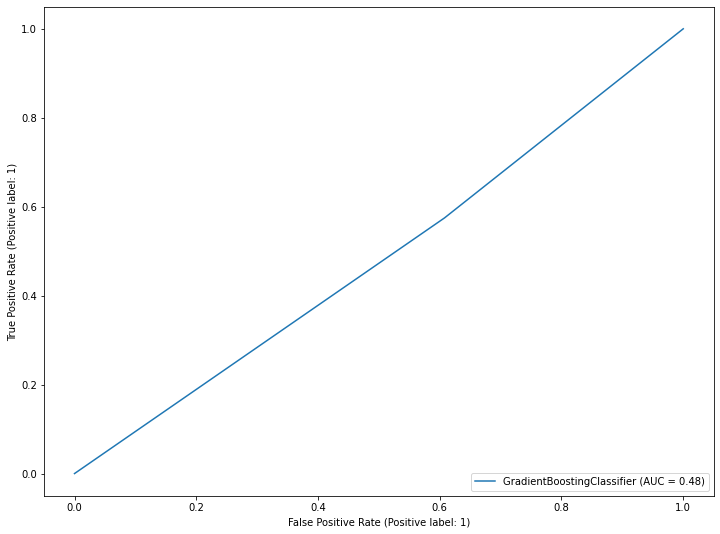

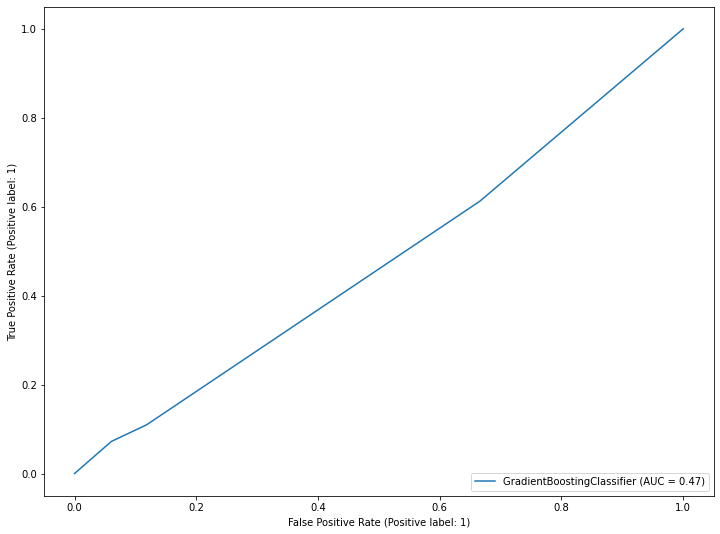

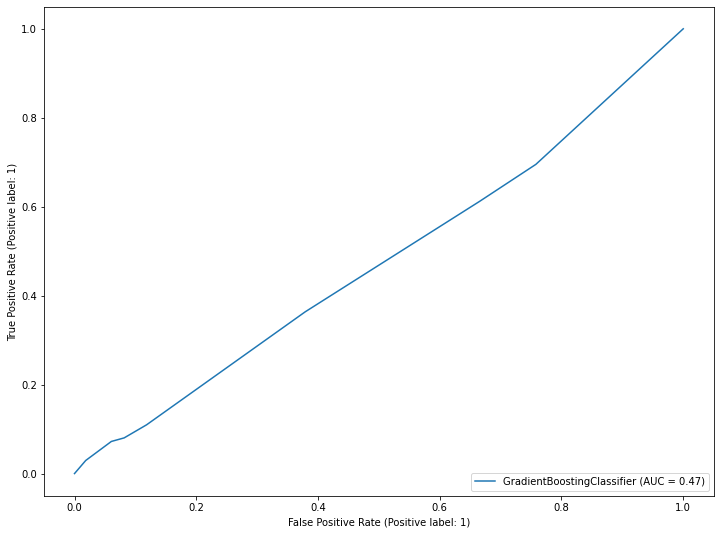

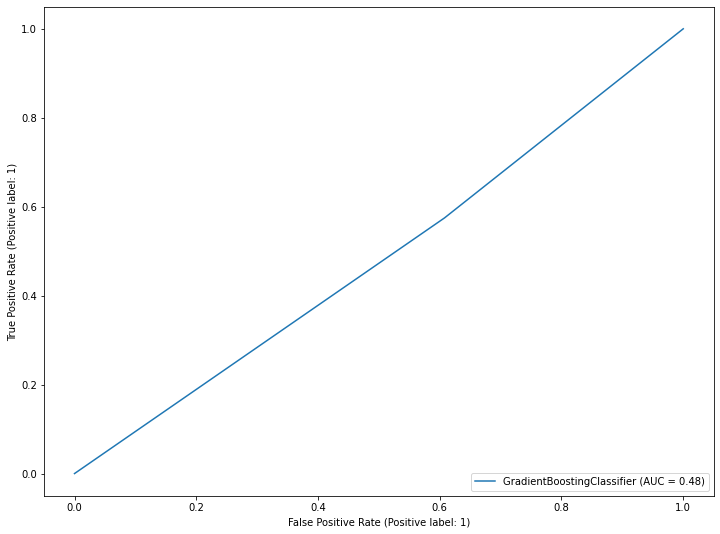

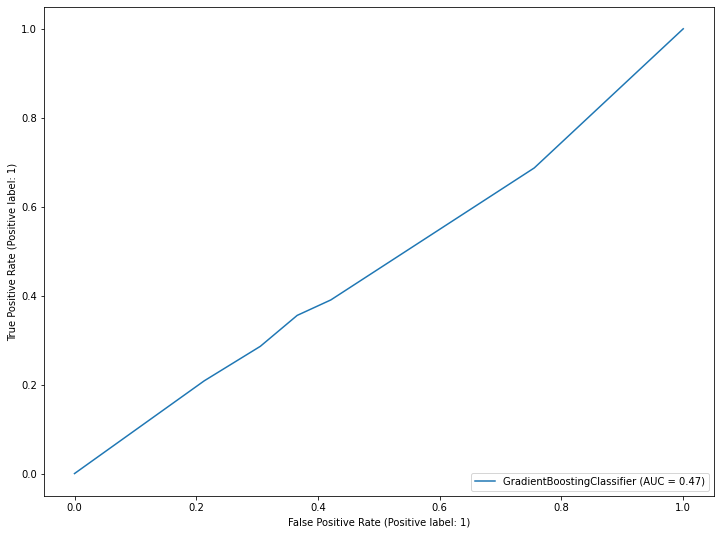

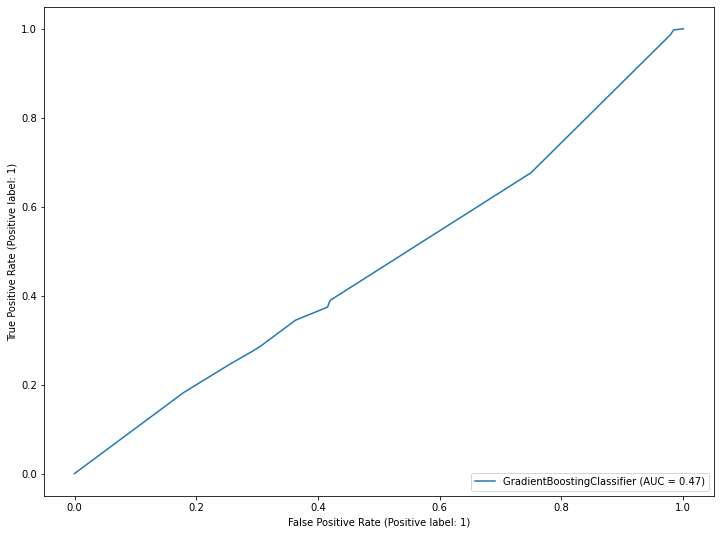

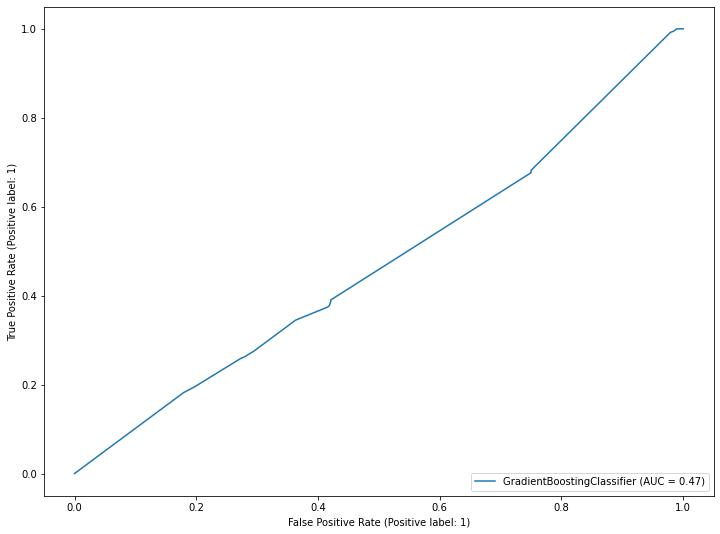

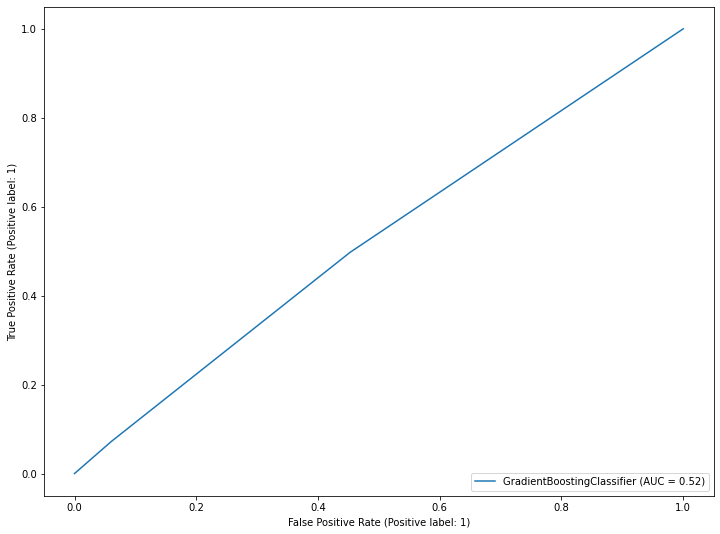

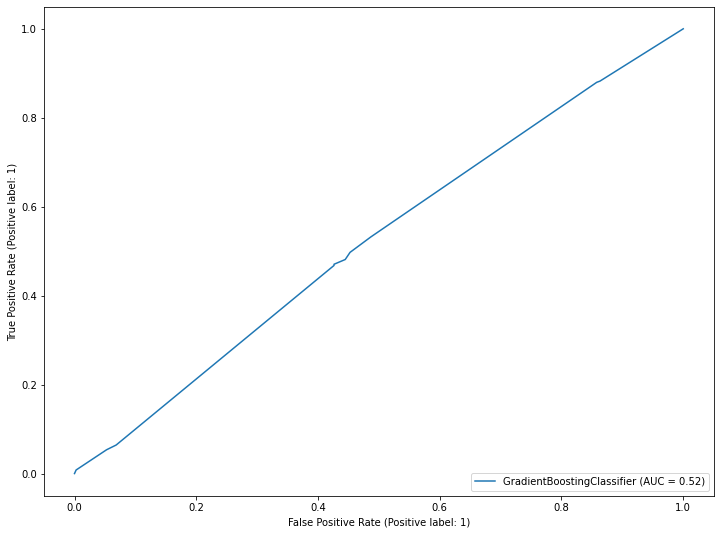

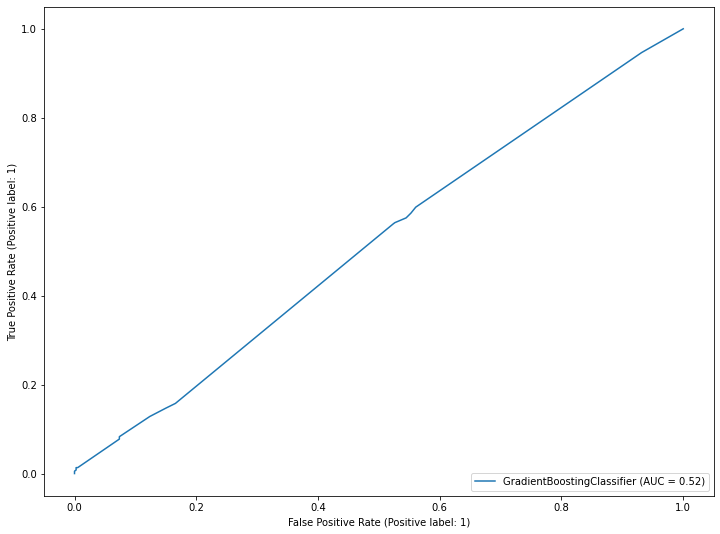

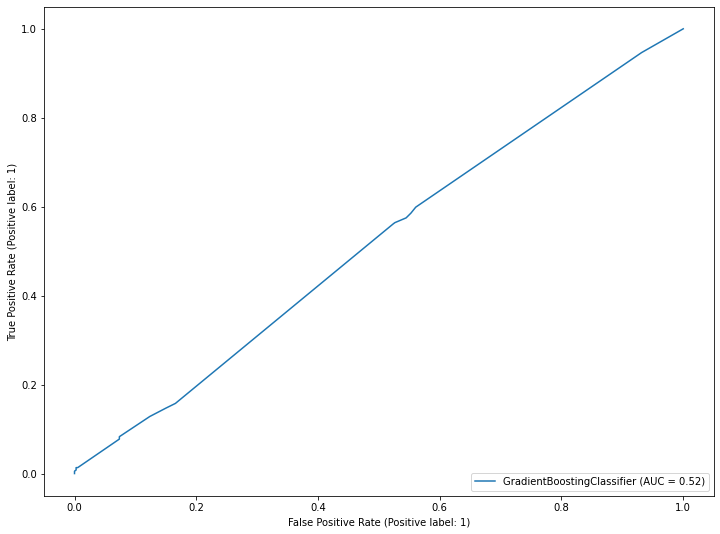

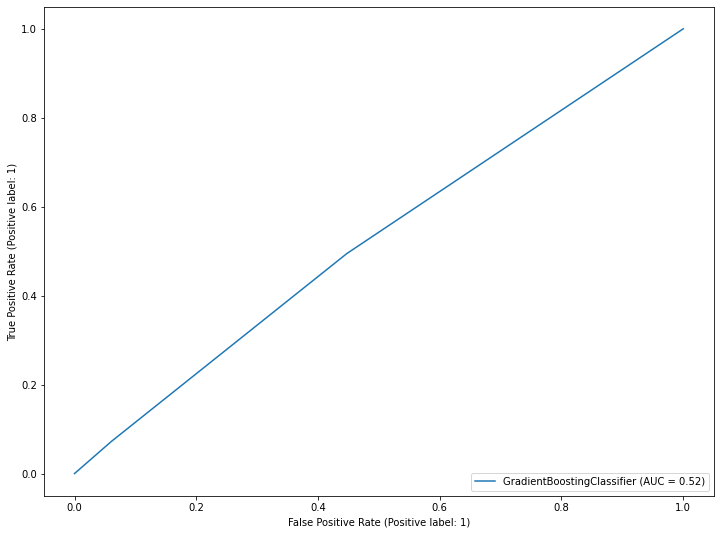

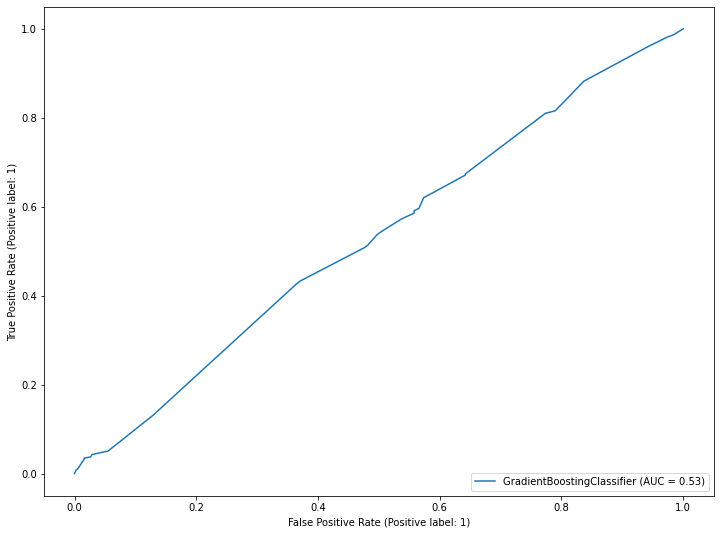

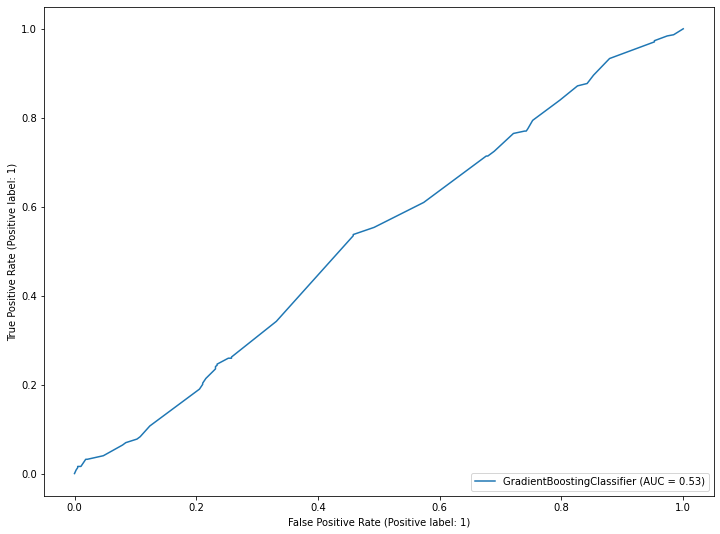

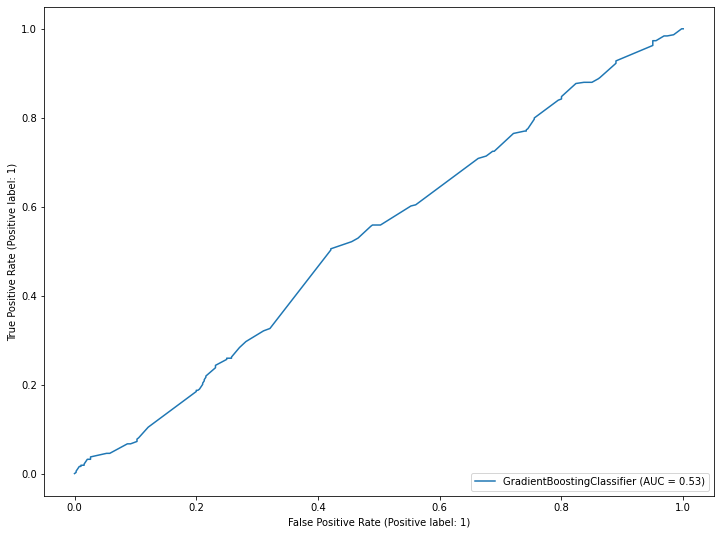

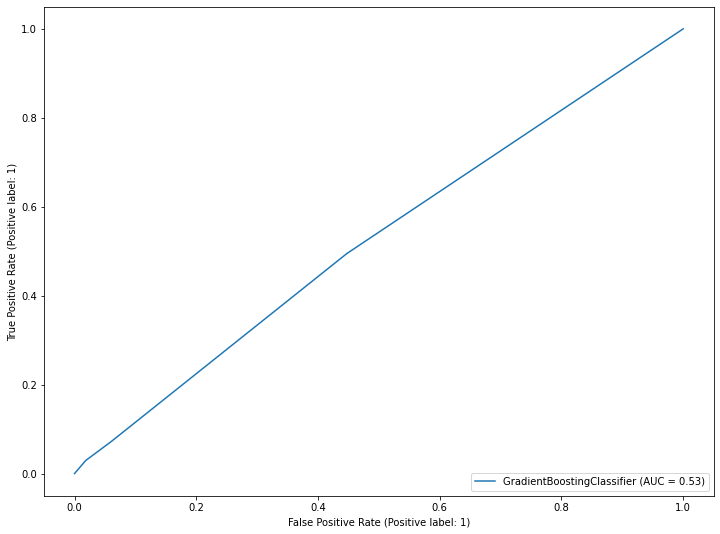

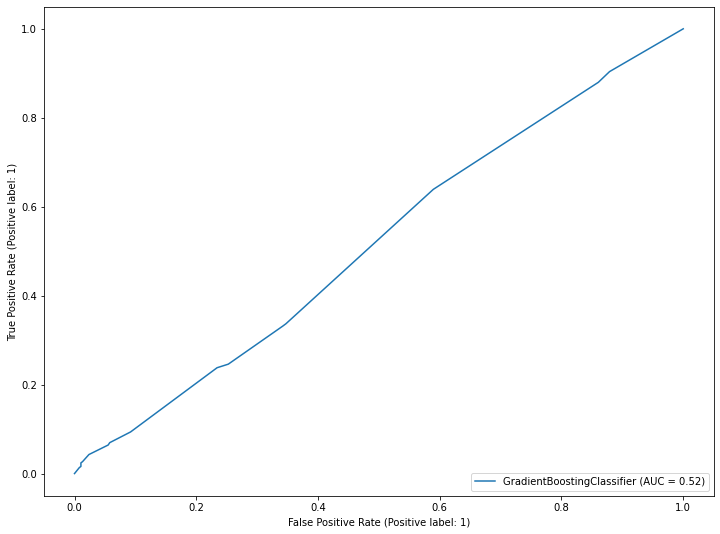

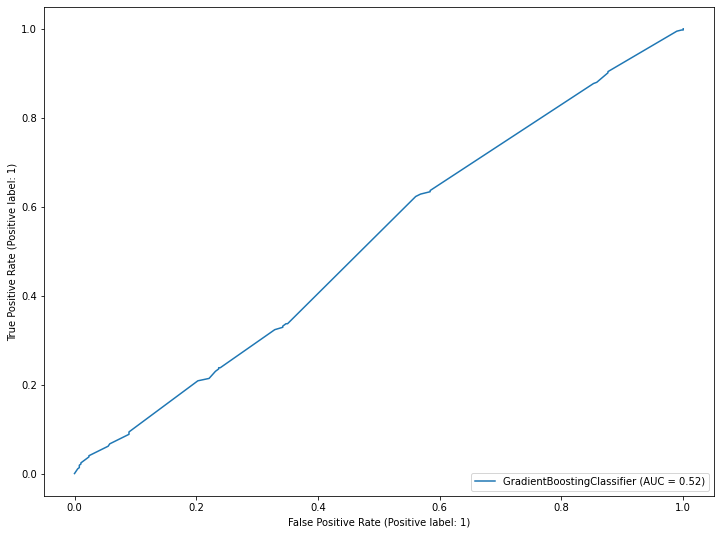

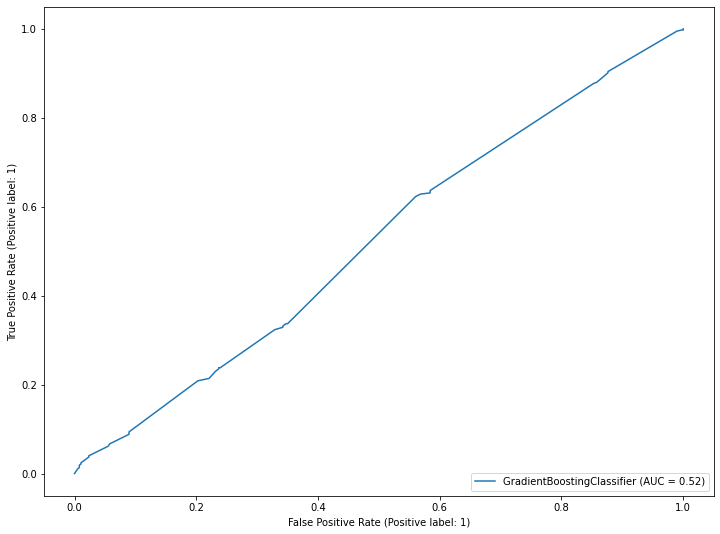

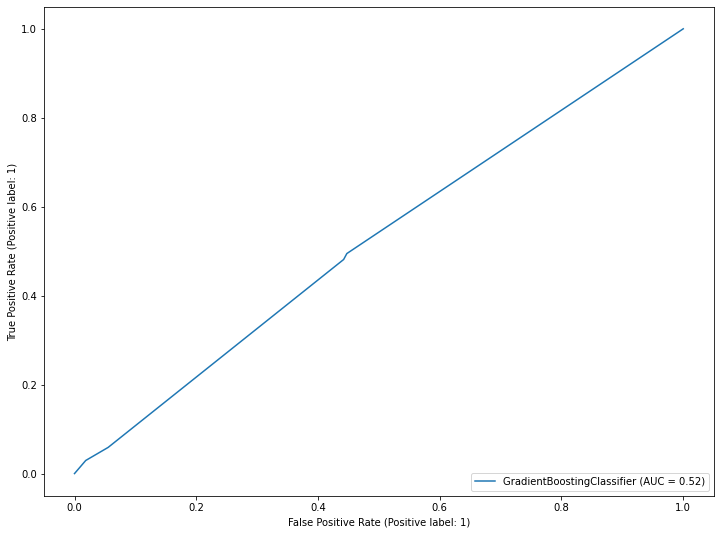

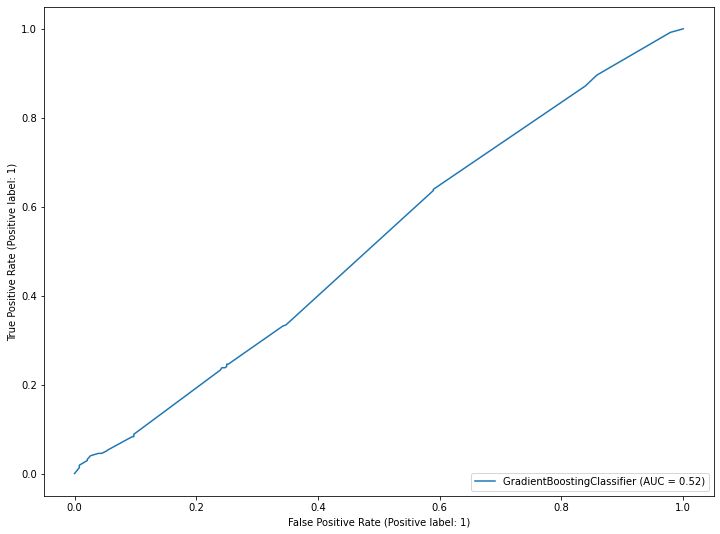

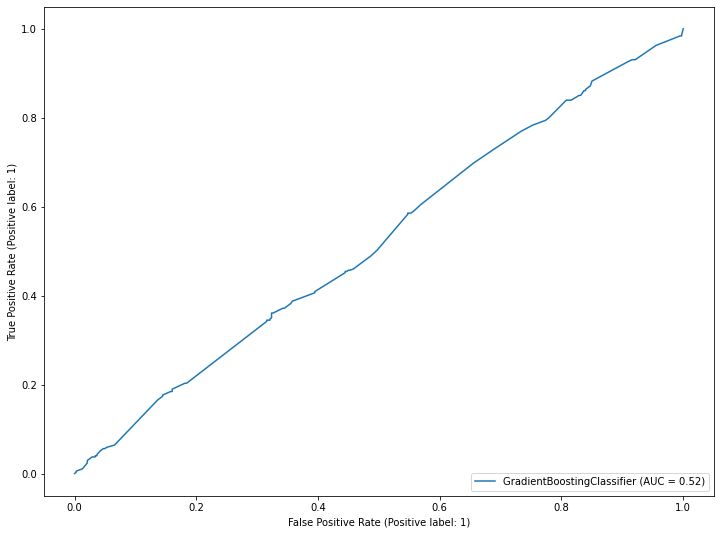

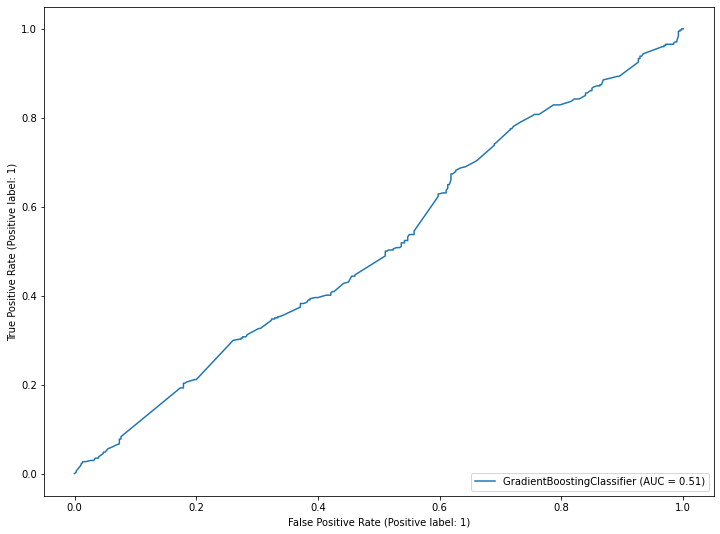

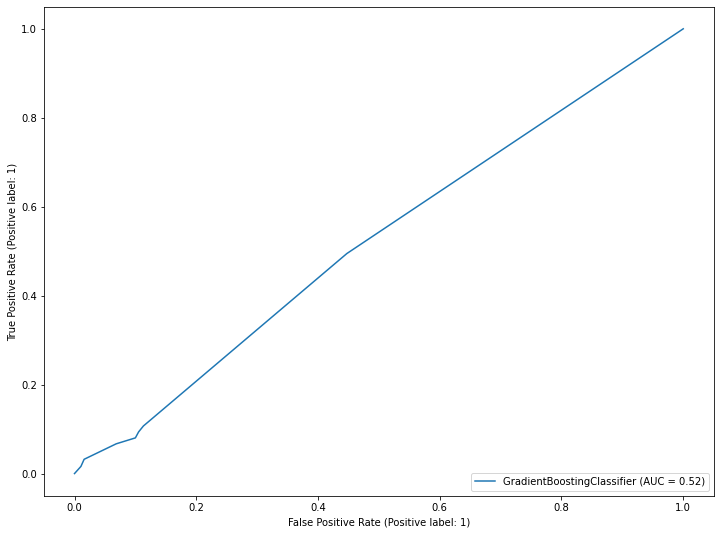

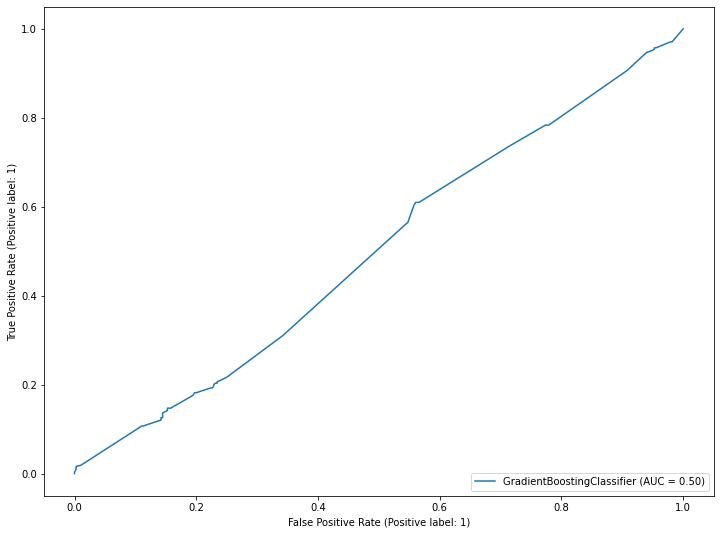

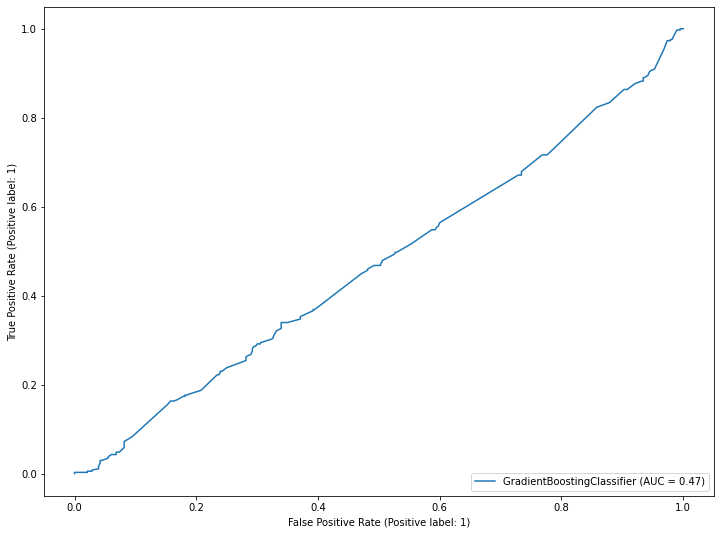

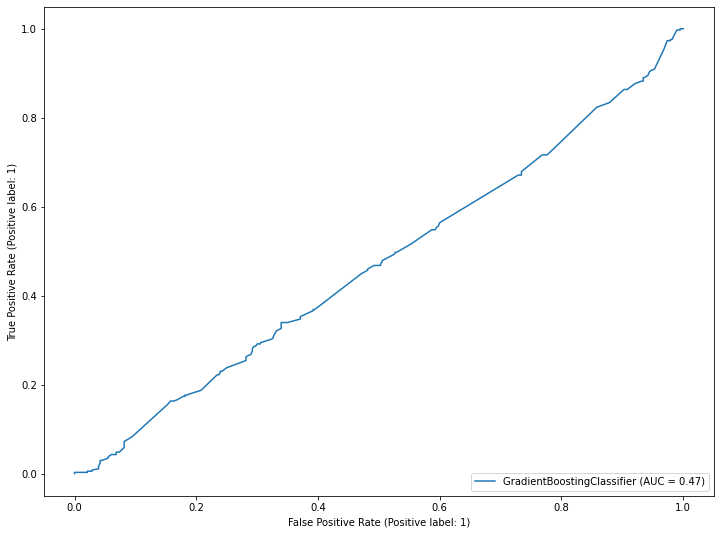

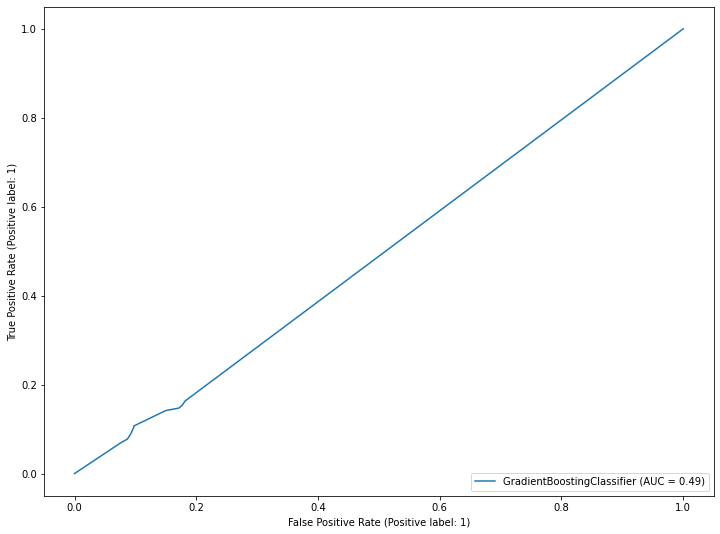

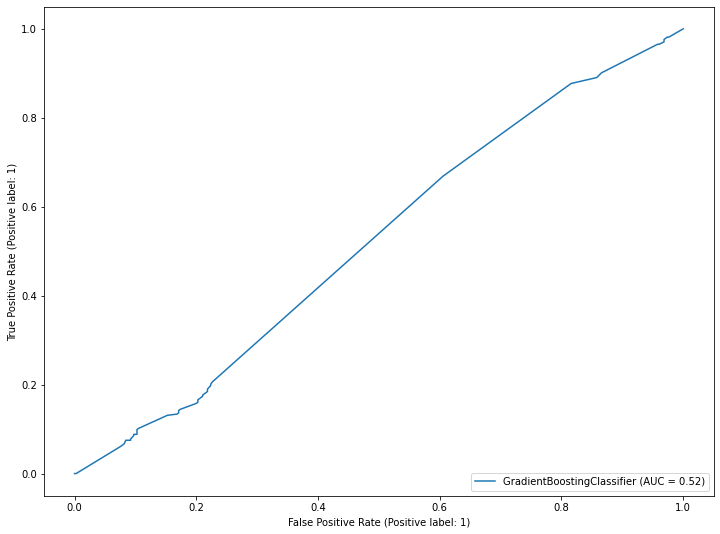

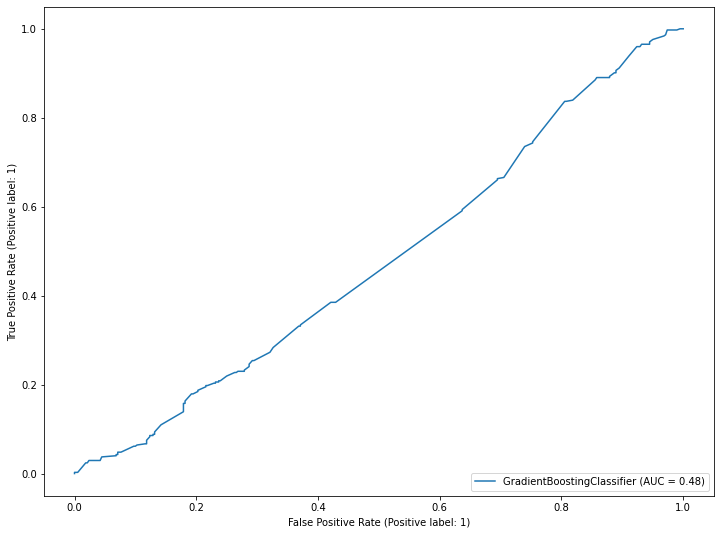

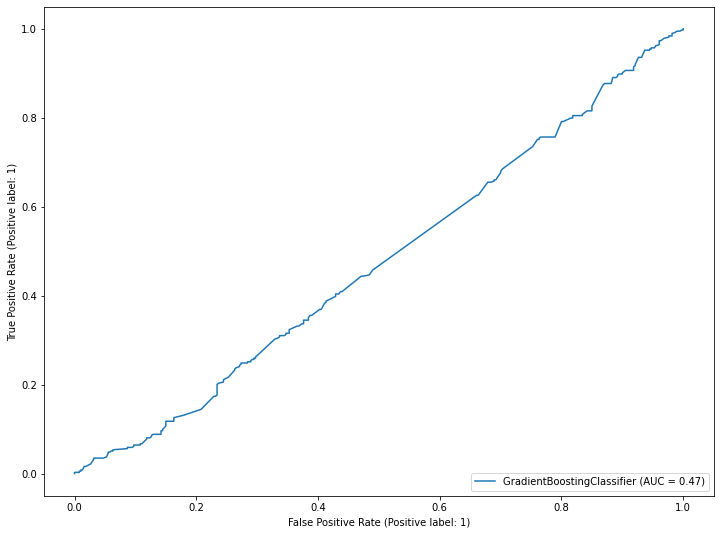

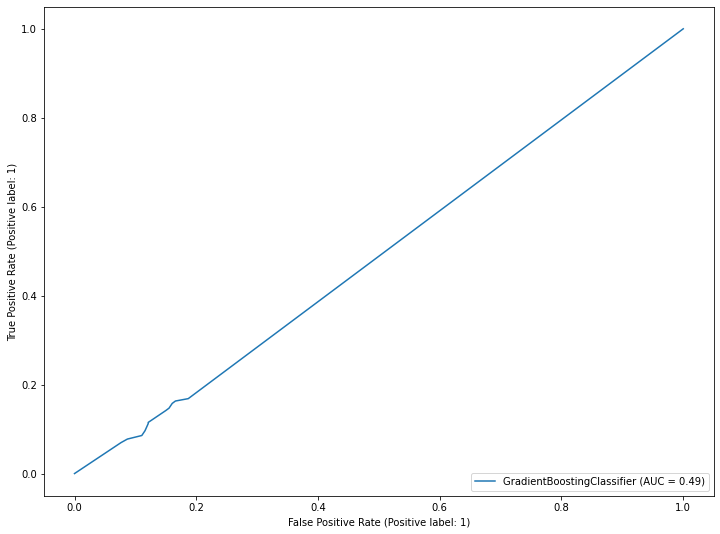

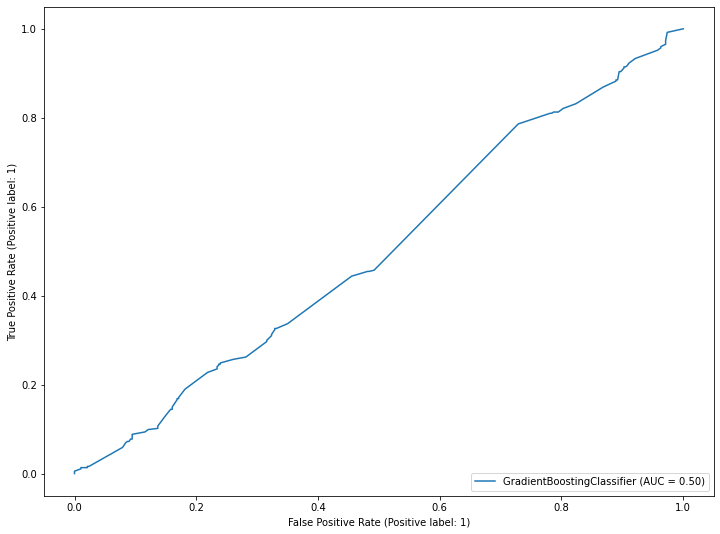

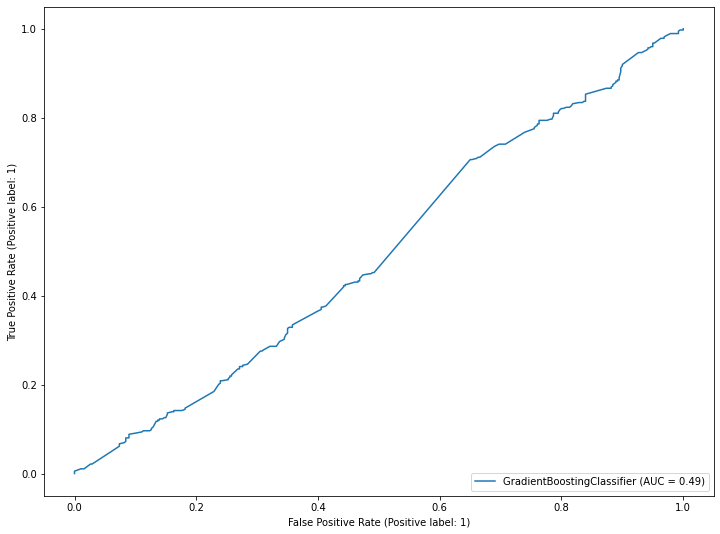

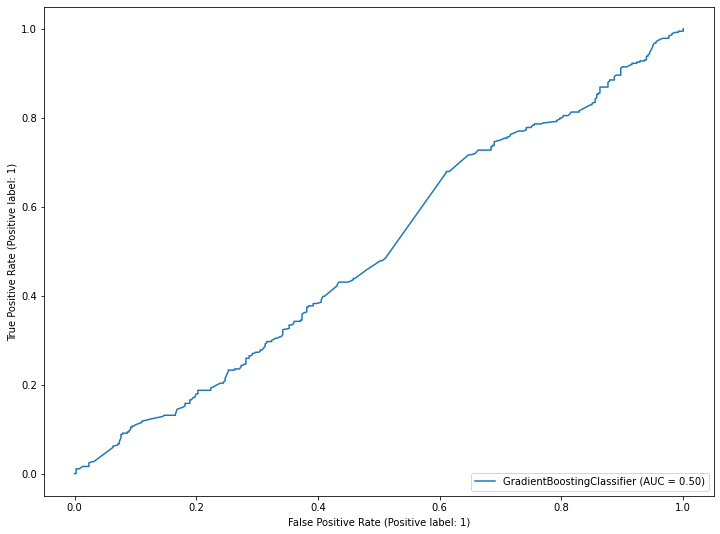

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10):
  for j in range(1,5):
    gbrt = GradientBoostingClassifier(max_depth=i, n_estimators=j, learning_rate=1.0, random_state = rnd_state)
    gbrt.fit(X_train, y_train)

    RocCurveDisplay.from_estimator(gbrt, X_valid, y_valid)

### Fine-tune the selected "best" models

Let's go ahead and take the Gradient Boost method, and try to tweak it for the best results on the training set.

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = [
    {'n_estimators': [5, 10, 20, 30], 'max_features': [2, 4, 6, 8, 10], 'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0]}]

In [56]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingClassifier()
grid_search = GridSearchCV(gbrt, param_grid, cv = 5, scoring = 'roc_auc', return_train_score = True)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.1, 0.3, 0.5, 0.7, 1.0],
                          'max_depth': [1, 2, 3, 4, 5],
                          'max_features': [2, 4, 6, 8, 10],
                          'n_estimators': [5, 10, 20, 30]}],
             return_train_score=True, scoring='roc_auc')

In [57]:
grid_search.best_params_

{'learning_rate': 1.0, 'max_depth': 4, 'max_features': 10, 'n_estimators': 5}

In [58]:
grid_search.best_estimator_

GradientBoostingClassifier(learning_rate=1.0, max_depth=4, max_features=10,
                           n_estimators=5)

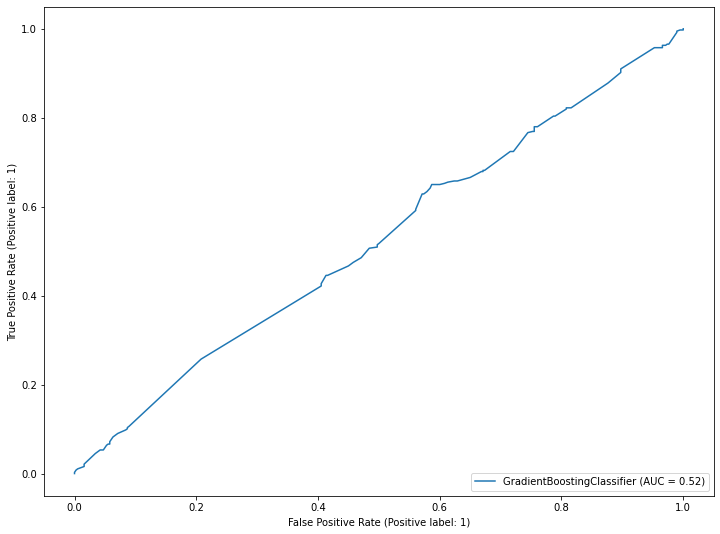

In [63]:
gbrt = GradientBoostingClassifier(max_depth=4, n_estimators=5, learning_rate=1.0)
gbrt.fit(X_train, y_train)

RocCurveDisplay.from_estimator(gbrt, X_test, y_test)

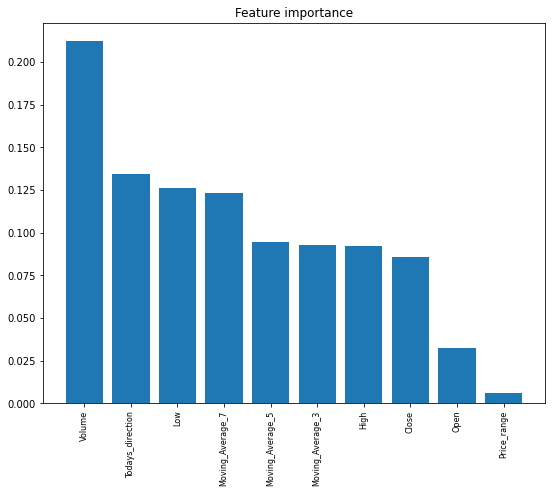

In [78]:
X_cols = [i for i in X_train.columns]

import numpy as np
# Calculate feature importances
importances = gbrt.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train[X_cols].columns[i] for i in indices]

_ = plt.figure(figsize=(9, 7))
plt.bar(names, importances[indices])
_ = plt.title("Feature importance")
_ = plt.xticks(rotation=90, fontsize = 8)
plt.savefig("feat.jpg")